# Classification

## Saccade and intersaccade

The trajectories of flying insects are often composed of saccade, \
a rapide rotation, and intersaccade, period of no rapid turn. During \
a saccade the angular velocity can reach several hundred or thousands of \
degrees per second.

An example of a saccadic flight

In [1]:
import numpy as np
from navipy.trajectories.random import saccadic_traj
from navipy.tools.plots import get_color_frame_dataframe
import matplotlib.pyplot as plt
%matplotlib inline

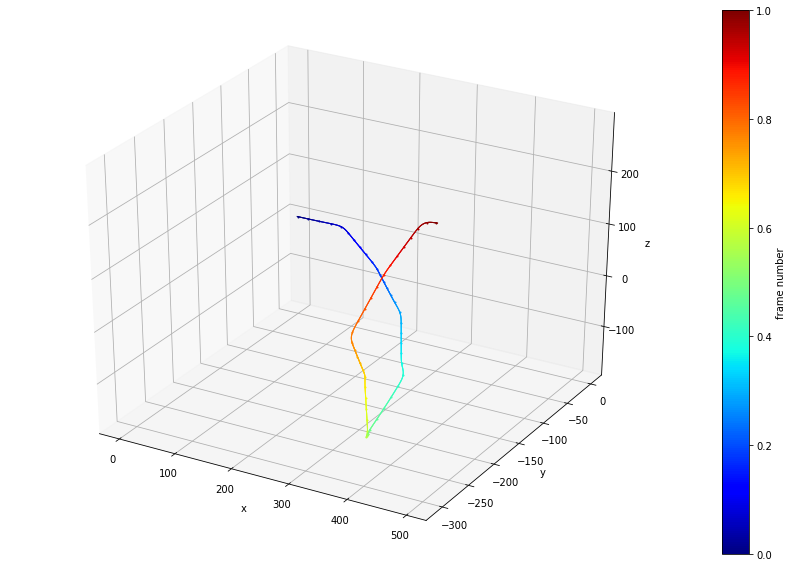

In [2]:
# fix the seed for constant example
np.random.seed(0)
# generate fake saccadic data
trajectory, saccade_df = saccadic_traj()
# for colors
colors, sm = get_color_frame_dataframe(frame_range=[
    trajectory.index.min(),
    trajectory.index.max()], cmap=plt.get_cmap('jet'))

# Plot he trajectory in lollipops
f = plt.figure(figsize=(15, 10))
ax = f.add_subplot(111, projection='3d')
trajectory.lollipops(ax,
          colors, step_lollipop=20,
          offset_lollipop=1, lollipop_marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
cb = f.colorbar(sm)
cb.set_label('frame number')

To extract the saccade from a trajectory, we need to use the angular
velocity, and two thresholds. When the angular velocity is above the 
highest threshold, we have a saccade. When the angular velocity is 
below the lowest threshold, we have an intersaccade. Part of the 
trajectory between the threshold are unclassified. Indeed it could part
of the saccade or intersaccade, depending on the noise presents in the 
trajectory.


In [10]:
from navipy.trajectories.tools import extract_sacintersac

thresholds = [0.02, 0.03]
sacintersac, angvel = extract_sacintersac(trajectory, thresholds)

And then plot for example the result of the saccade intersaccade
extraction as follow:

/home/bolirev/.virtualenv/toolbox-navigation/lib/python3.6/site-packages/matplotlib-2.1.0-py3.6-linux-x86_64.egg/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


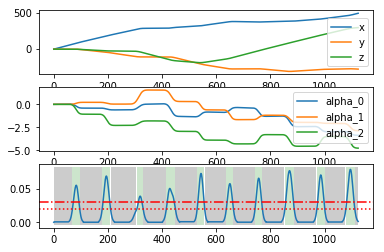

In [11]:
f, axarr = plt.subplots(3, 1)
ax = axarr[0]
trajectory.loc[:, 'location'].plot(ax=ax)
ax = axarr[1]
trajectory.loc[:, trajectory.rotation_mode].plot(ax=ax)
ax = axarr[2]
angvel.plot(ax=ax)
ax.axhline(min(thresholds), color='r', linestyle=':')
ax.axhline(max(thresholds), color='r', linestyle='-.')
ylim = ax.get_ylim()
ax.fill_between(sacintersac.index, min(ylim), max(ylim),
                where=sacintersac.saccade >= 0,
                facecolor='green',
                alpha=0.2)
ax.fill_between(sacintersac.index, min(ylim), max(ylim),
                where=sacintersac.intersaccade >= 0,
                facecolor='black',
                alpha=0.2)
f.show()